<a href="https://colab.research.google.com/github/lucashamon1/Consumo-de-Cerveja/blob/main/Curso_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
dados = pd.read_csv('Consumo_cerveja.csv', sep =';')

In [ ]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [ ]:
dados.shape

(365, 7)

##**Análises Preliminares**

In [ ]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


##Testando Correlação

In [ ]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Com base nessa tabela podemos ver a relação de cada variável com o consumo de cerveja

##**Comportamento da Variável Dependente**

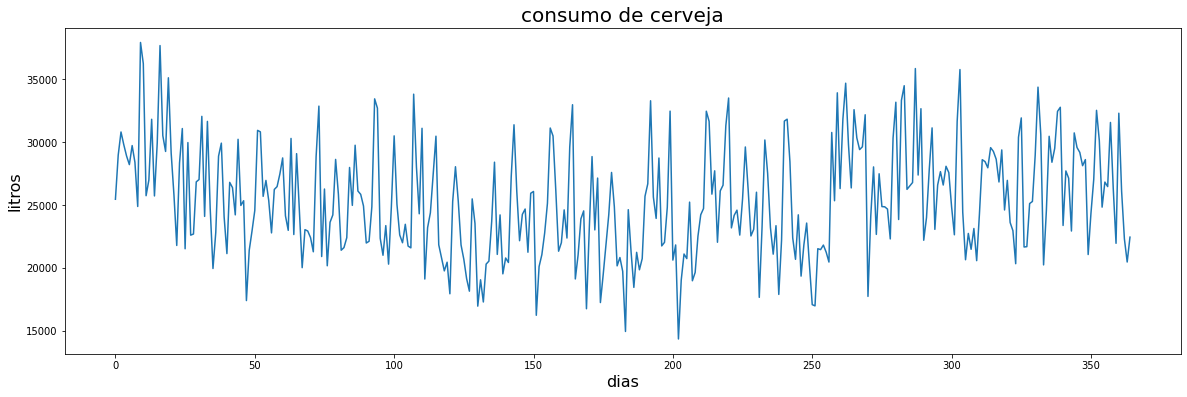

In [ ]:
fig, ax = plt.subplots(figsize= (20,6))
ax.set_title('consumo de cerveja', fontsize=20)
ax.set_ylabel('litros',fontsize=16)
ax.set_xlabel('dias',fontsize=16)
ax= dados['consumo'].plot()

##Boxplot

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'consumo de cerveja')

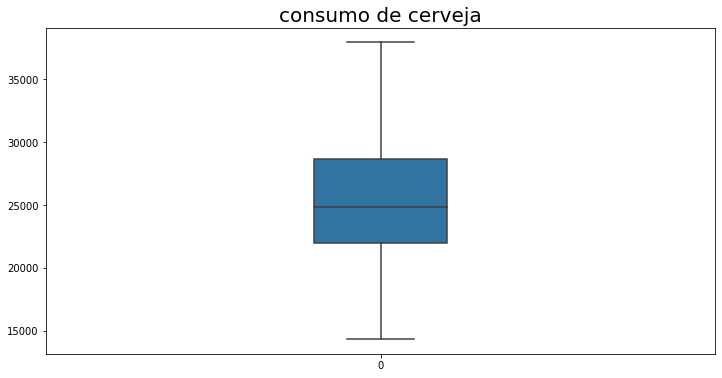

In [ ]:
ax = sns.boxplot(data=dados['consumo'], orient = 'v', width= 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('consumo de cerveja', fontsize=20)

##Boxplot com Duas Variáveis

Text(0.5, 0, 'Final de semana')

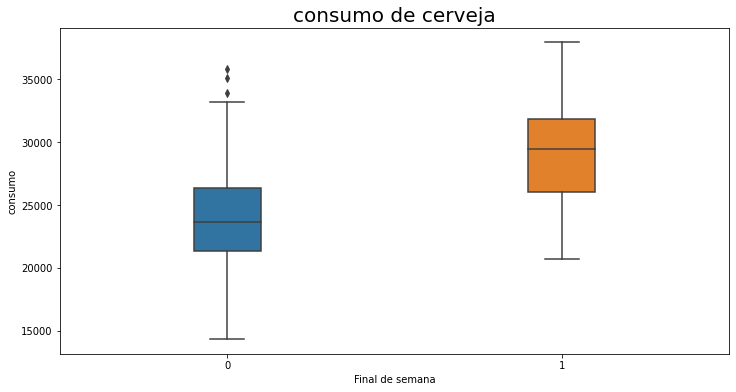

In [ ]:
ax = sns.boxplot(y='consumo', x='fds',data=dados, orient = 'v', width= 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('consumo de cerveja', fontsize=20)
ax.set_ylabel('consumo')
ax.set_xlabel('Final de semana')

##**Distribuição de Frequências**

AttributeError: ignored

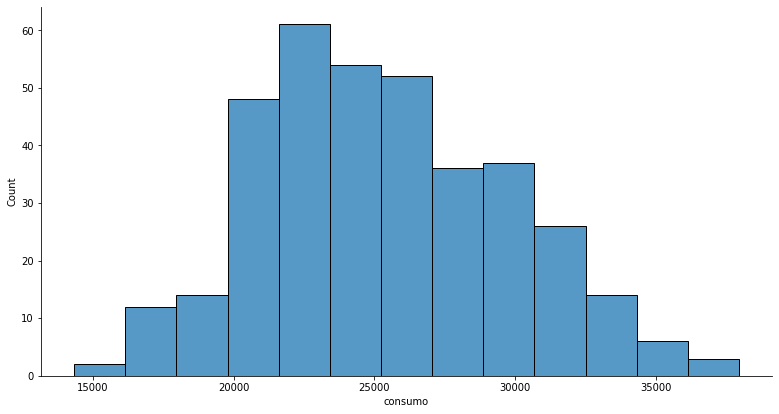

In [ ]:
ax = sns.displot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('distribuição de frequências', fontsize=20)
ax.set_ylabel('consumo de cerveja (litros)', fontsize=16)
ax

##Pairplot

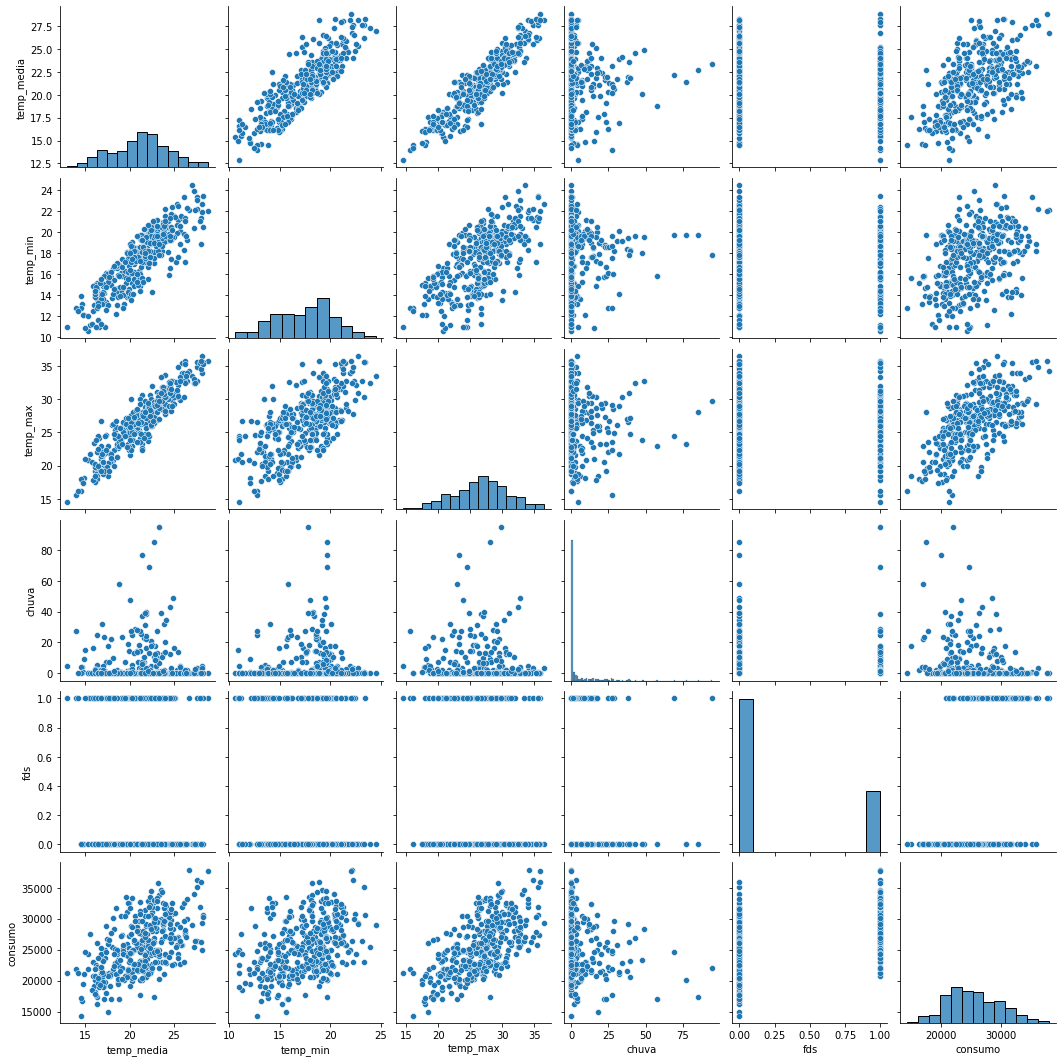

In [ ]:
ax = sns.pairplot(dados)

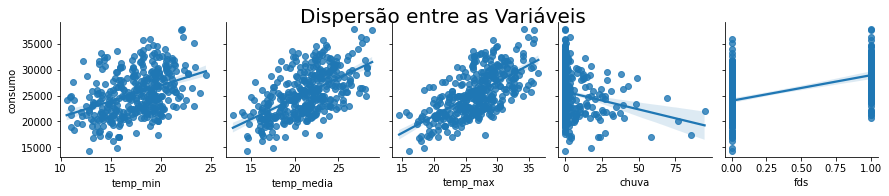

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min','temp_media', 'temp_max','chuva','fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Jointplot

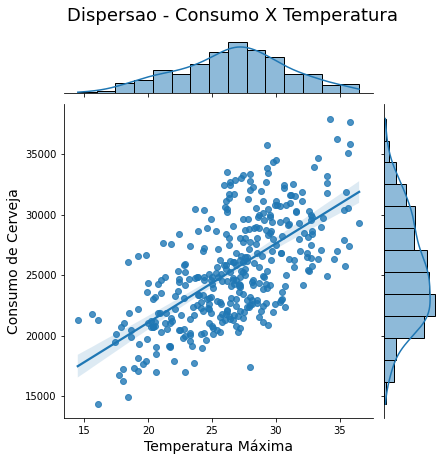

In [ ]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

##Lmplot

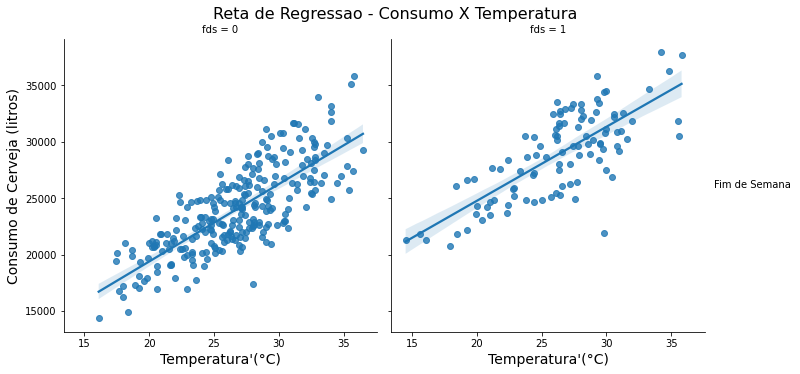

In [ ]:
ax= sns.lmplot(x='temp_max', y='consumo', data=dados, col='fds')
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura'(°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

##**Datasets de Treino e de Teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y= dados['consumo']

In [ ]:
x= dados[['temp_max','chuva','fds']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=2811)

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

In [ ]:
Y_train.shape

(255,)

In [ ]:
Y_test.shape

(110,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print('R² = {}'.format(modelo.score(X_train, Y_train).round(2)))

R² = 0.73


In [ ]:
previsâo_y = modelo.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(Y_test, previsâo_y).round(2))

R² = 0.69


##**Obtendo Previsões Pontuais**

In [ ]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [ ]:
modelo.predict(entrada)[0]

26094.901775262017

In [ ]:
temp_max= 40
chuva = 0
fds= 1
entrada = [(temp_max, chuva, fds)]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


In [ ]:
modelo.intercept_

5951.976339312445

In [ ]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [ ]:
x.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [ ]:
index=['intercepto','Temperatura Máxima', 'Chuva(mm)','Final de Semana']

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva(mm),-60.782435
Final de Semana,5401.083339


In [ ]:
previsâo_y = modelo.predict(X_train)

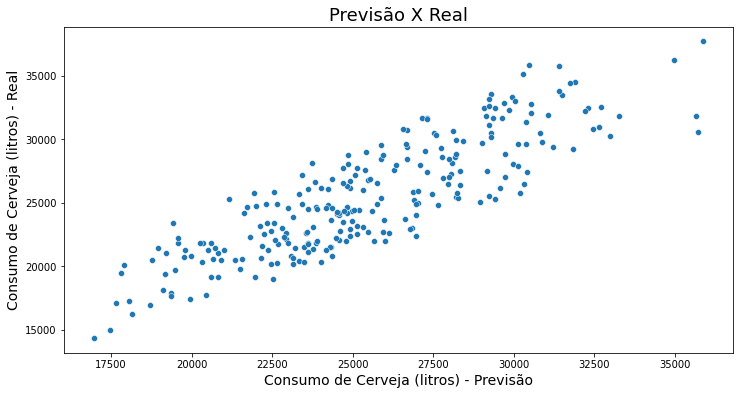

In [ ]:
ax = sns.scatterplot(x=previsâo_y, y=Y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [ ]:
residuo = Y_train - previsâo_y

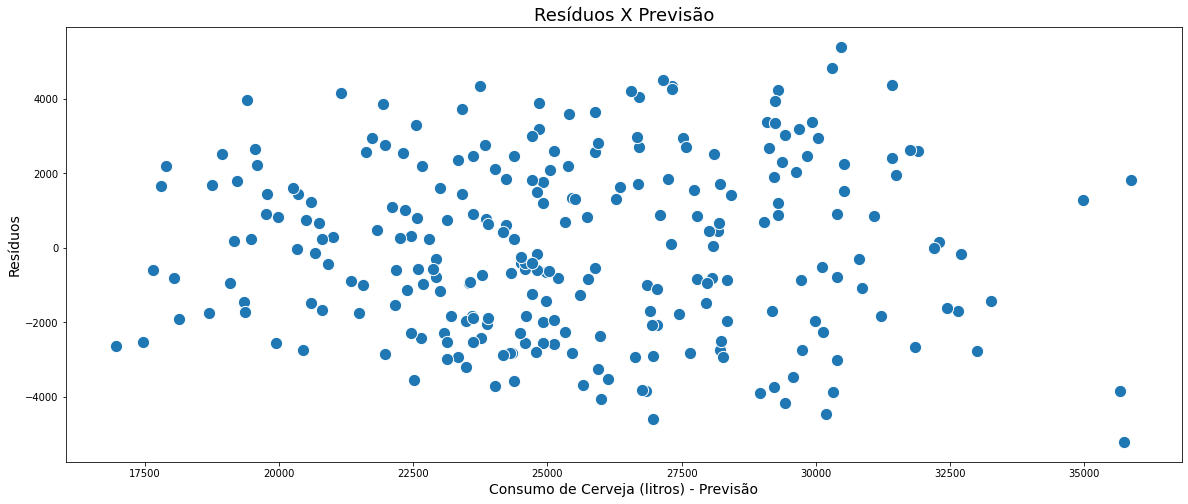

In [ ]:
ax = sns.scatterplot(x=previsâo_y, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

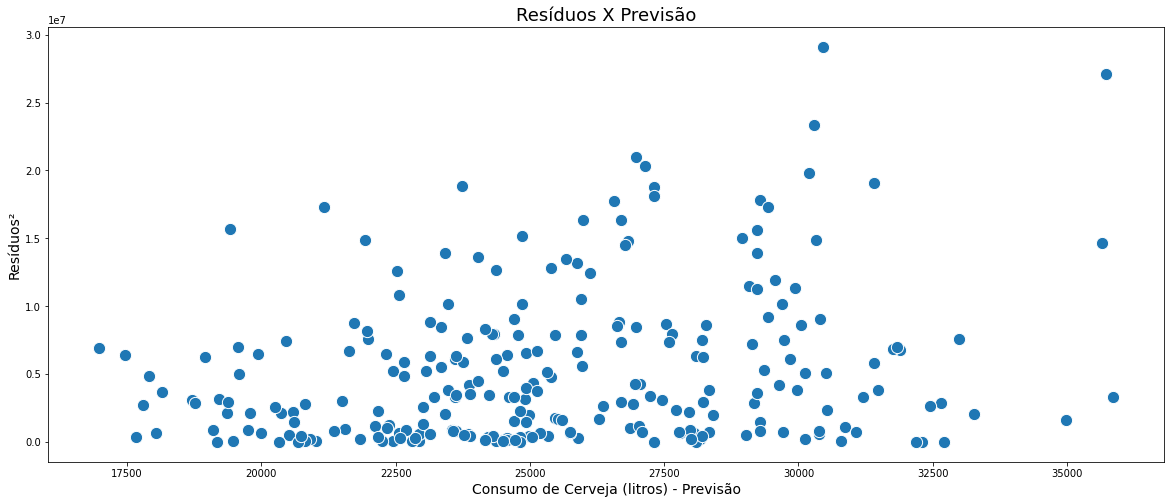

In [ ]:
ax = sns.scatterplot(x=previsâo_y, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

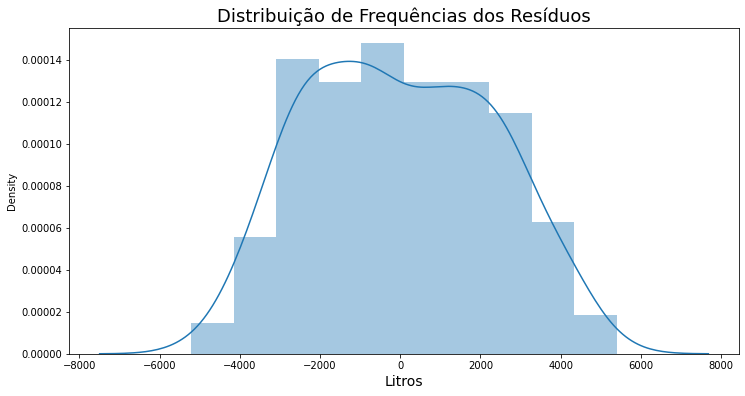

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

##**Comparando Modelos**

In [ ]:
X2 = dados[['temp_media', 'chuva', 'fds']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [ ]:
modelo.fit(X2_train, y2_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [ ]:
print('Modelo com Tem. Média')
print('R² = {}'.format(modelo.score(X2_train, y2_train).round(2)))

Modelo com Tem. Média
R² = 0.66


In [ ]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(modelo.score(X_train, Y_train).round(2)))

Modelo com Tem. Máxima
R² = -0.38


##**Salvando o Modelo**

In [ ]:
import pickle

In [ ]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()